1. Importing data files into python(Jypiter notebook) through Pandas..  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
df=pd.read_csv(r"C:\Users\sanju\OneDrive\Desktop\imports-85.data", header=None) #reading the csv file and saying it doesn't have any headers
print(df)      

     0    1            2       3      4     5            6    7      8   \
0     3    ?  alfa-romero     gas    std   two  convertible  rwd  front   
1     3    ?  alfa-romero     gas    std   two  convertible  rwd  front   
2     1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   
3     2  164         audi     gas    std  four        sedan  fwd  front   
4     2  164         audi     gas    std  four        sedan  4wd  front   
..   ..  ...          ...     ...    ...   ...          ...  ...    ...   
200  -1   95        volvo     gas    std  four        sedan  rwd  front   
201  -1   95        volvo     gas  turbo  four        sedan  rwd  front   
202  -1   95        volvo     gas    std  four        sedan  rwd  front   
203  -1   95        volvo  diesel  turbo  four        sedan  rwd  front   
204  -1   95        volvo     gas  turbo  four        sedan  rwd  front   

        9   ...   16    17    18    19    20   21    22  23  24     25  
0     88.6  ...  130  mpfi

2. As the file contains no header, thus we will add headers.

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mg","highway-mpg","price"]
df.columns=headers     #adding the headres in columns
print(df.head(5))      #printing only first 5 rows 
print(df['fuel-type']) #printing only a column data

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

3. indentifying and cleaning missing values.

In [3]:
import numpy as np
df.replace('?',np.nan, inplace=True)     #replacing ? with nan
print(df)

     symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

4. Identifying missing values and counting  no of them.

In [4]:
df1=df.isnull()                          #indentifying missing values
for column in df1.columns.values.tolist():
    print(column)
    print (df1[column].value_counts())   #counting no of missing values. 
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

5. Clearing rows with missing values.

In [5]:
df.dropna(axis=0,inplace=True)  # clearing entire rows with missing values.  
print(df)

     symboling normalized-losses   make fuel-type aspiration num-of-doors  \
3            2               164   audi       gas        std         four   
4            2               164   audi       gas        std         four   
6            1               158   audi       gas        std         four   
8            1               158   audi       gas      turbo         four   
10           2               192    bmw       gas        std          two   
..         ...               ...    ...       ...        ...          ...   
200         -1                95  volvo       gas        std         four   
201         -1                95  volvo       gas      turbo         four   
202         -1                95  volvo       gas        std         four   
203         -1                95  volvo    diesel      turbo         four   
204         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  

6. Checking wheater all of the data is of same type or not and modifying them.

In [6]:
print(df.dtypes) # checking the data types of columns
df[['normalized-losses','horsepower','price','peak-rpm']]=df[['normalized-losses','horsepower','price','peak-rpm']].astype('int')
df[['bore','stroke']]=df[['bore','stroke']].astype('float')
print(df.dtypes) # checking the updated data types of columns

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mg                int64
highway-mpg            int64
price                 object
dtype: object
symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object


7. correlation between variables(Numericals)

In [7]:
df[['bore','stroke','compression-ratio','horsepower']].corr  #correaltion between selcted columns

<bound method DataFrame.corr of      bore  stroke  compression-ratio  horsepower
3    3.19    3.40               10.0         102
4    3.19    3.40                8.0         115
6    3.19    3.40                8.5         110
8    3.13    3.40                8.3         140
10   3.50    2.80                8.8         101
..    ...     ...                ...         ...
200  3.78    3.15                9.5         114
201  3.78    3.15                8.7         160
202  3.58    2.87                8.8         134
203  3.01    3.40               23.0         106
204  3.78    3.15                9.5         114

[159 rows x 4 columns]>

8. plotting scatter plots to show linear realtionship between two variables. 

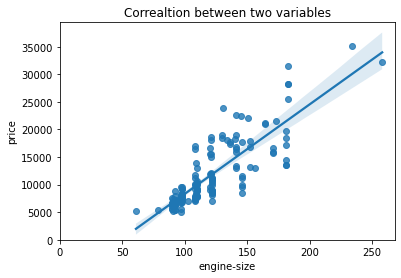

,engine-size,price
engine-size,1.000000,0.841496
price,0.841496,1.000000


In [8]:
sns.regplot(x='engine-size',y='price',data=df) #using seaborn statistical fuctions. more about arguments on copy
plt.ylim(0,)                                   #sets upper and lower limit of Y-axis 
plt.xlim(0,)                                   #sets upper and lower limit of X-axis
plt.title('Correaltion between two variables')
plt.show()
df[['engine-size','price']].corr()             #calculating correaltion value

9. Correlation betweeen categorical values.
   9.1 Box-Plot 

10.SIMPLE LINEAR REGRESSION MODEL- to FIT the MODEL

In [13]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression
x=df[['highway-mpg']]
y=df[['price']]
lm.fit(x,y)
yhat=lm.predict(x)

TypeError: fit() missing 1 required positional argument: 'y'